# Regresion logística
En una regresión logística se tiene una variable objetivo $Y$ la cual es binaria y es de interes para el investigador.
Se quiere construir una función $f(X)$ donde $X=(X_1, \ldots, X_p)$ es un conjunto de variables exogenas que se utilizaran para pronosticar a $Y$.

En un modelo de regresión lineal logística, se usan las funciones del tipo:
$$\ln \left(\frac{p_i}{1-p_i} \right)=\beta_0 +\beta_1X_1+\beta_2X_2+...+\beta_pX_p  $$ 
donde $p=P(Y=1)$

La documentación de LogisticRegression esta [acá](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [102]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
### Importa regresión logistica
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import graphviz
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#### Volver dummie a Y
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegressionCV

In [2]:
x=np.array([[20],[21],[22],[28],[30],[35],[40],[41],[45],[50],[53], [60],[70], [80]])
y=[0,0,0,0,0,0,0,1,1,1,1,0,0,0]

In [3]:
pd.DataFrame(zip(x,y), columns=["Edad", "Y"])

,Edad,Y
0,[20],0
1,[21],0
2,[22],0
3,[28],0
4,[30],0
5,[35],0
6,[40],0
7,[41],1
8,[45],1
9,[50],1


In [4]:
reg_lin_amano=LogisticRegression(C=1, penalty="none")
reg_lin_amano.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(C=1, penalty='none')

In [5]:
reg_lin_amano.intercept_

array([-1.81424772])

In [6]:
reg_lin_amano.coef_

array([[0.02048877]])

In [7]:
x1=np.array([[28]])
reg_lin_amano.predict_proba(x1)

array([[0.77566183, 0.22433817]])

In [8]:
reg_lin_amano.predict(x1)

array([0])

In [9]:
x1=np.array([[70]])
reg_lin_amano.predict_proba(x1)

array([[0.59388119, 0.40611881]])

In [10]:
Probs = pd.DataFrame(reg_lin_amano.predict_proba(x), columns=["Sano", "Enfermo"])
Probs["Y_real"]=y
Probs["Y_pron"]=0
umbral =0.5
for i in range(14):
  if Probs["Enfermo"][i]>umbral:
    Probs.loc[i,"Y_pron"]=1
Probs

,Sano,Enfermo,Y_real,Y_pron
0,0.802893,0.197107,0,0
1,0.799630,0.200370,0,0
2,0.796327,0.203673,0,0
3,0.775662,0.224338,0,0
4,0.768451,0.231549,0,0
5,0.749724,0.250276,0,0
6,0.730015,0.269985,0,0
7,0.725957,0.274043,1,0
8,0.709355,0.290645,1,0
9,0.687790,0.312210,1,0


In [11]:
y_pron = reg_lin_amano.predict(x)
y_pron

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
confusion_matrix(y, y_pron)

array([[10,  0],
       [ 4,  0]])

### Metricas

1. [Acá](https://en.wikipedia.org/wiki/Confusion_matrix)
2. Las métricas en Sklearn [Acá](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [13]:
# de 0 a 99 cada 1
X = np.arange(20, 80, 1)
  
# Construyo la función de probabilidades
DD = 1/(1+np.exp(1.81-0.02*X))
pd.DataFrame(zip(X,DD), columns=["Age", "PDiabetes"])

,Age,PDiabetes
0,20,0.196234
1,21,0.199408
2,22,0.202620
3,23,0.205870
4,24,0.209159
5,25,0.212487
6,26,0.215853
7,27,0.219257
8,28,0.222700
9,29,0.226181


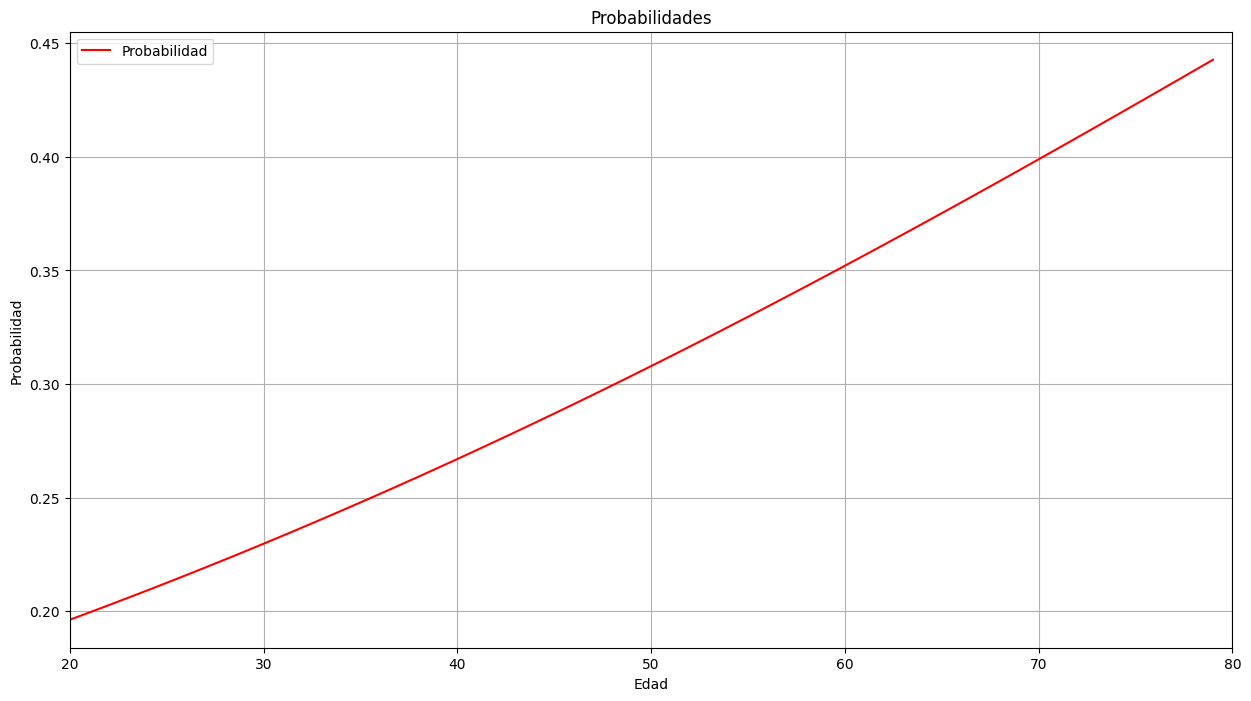

In [14]:
#####
plt.figure(figsize=(15,8))  
# Plotting both the curves simultaneously
plt.plot(X, DD, color='r', label='Probabilidad')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Edad")
plt.ylabel("Probabilidad")
plt.title("Probabilidades")
plt.xlim(20, 80) 
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()  
plt.grid()
# To load the display window
plt.show()

In [15]:

np.linspace(0,10, 20)

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [16]:
np.arange(0,10,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

## Un ejemplo con diabetes

In [17]:
url="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/Diabetes.csv"
Diabetes=pd.read_csv(url, sep=";")
### Y es la variable binaria (Positive o Negative)
Y=Diabetes["class"] ## Seleccionamos la variable objetivo (binaria)
### las X son todas las demas
X=Diabetes.drop("class", axis=1) ## Seleccionamos las variables explicativas
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [18]:
Diabetes.groupby("class").size()/Diabetes.shape[0]

class
Negative    0.384615
Positive    0.615385
dtype: float64

## Volver Dummie a X

In [19]:
X = Diabetes[['Age', 'Gender', 'Polyuria']]
X = pd.get_dummies(X, drop_first=True)
X

,Age,Gender_Male,Polyuria_Yes
0,40,1,0
1,58,1,0
2,41,1,1
3,45,1,0
4,60,1,1
...,...,...,...
515,39,0,1
516,48,0,1
517,58,0,1
518,32,0,0


In [20]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, random_state=123,test_size=0.2, stratify=Y) 
## Dividimos en entrenamiento y prueba, y estratificando
##por la variable Y
X_train.shape

(416, 3)

Como Y="Positive" o Y="Negative", el "Negative"=0 (Fracaso) y el "Positive"=1 (Exito)

La documentación de LogisticRegression esta [acá](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


El costo $C$ es inversamente proporcional
$$Costo=\frac{1}{C} $$

In [21]:
logreg=LogisticRegression(C=1) ### Llamo la regresión logistica, con todos
### los valores por defecto
logreg.fit(X_train, y_train) ## Entreno el modelo
print("Intercepto", logreg.intercept_)
print("Beta",pd.DataFrame(np.transpose(logreg.coef_), index=X_train.columns, columns=["betas"])) ## Extraigo los parámetros

Intercepto [0.57352395]
Beta                  betas
Age           0.004551
Gender_Male  -2.387198
Polyuria_Yes  3.649191


### Observando las probabilidades
1. Sí es hombre con poliuria
$$P(Y=1)=\frac{1}{1+e^{-1.83-0.004\times Edad}}$$

2. Sí es mujer con poliuria
$$P(Y=1)=\frac{1}{1+e^{-4.21-0.004\times Edad}}$$

3. Sí es mujer sin poliuria
$$P(Y=1)=\frac{1}{1+e^{-0.57-0.004\times Edad}}$$


4. Sí es hombre sin poliuria
$$P(Y=1)=\frac{1}{1+e^{1.81-0.004\times Edad}}$$

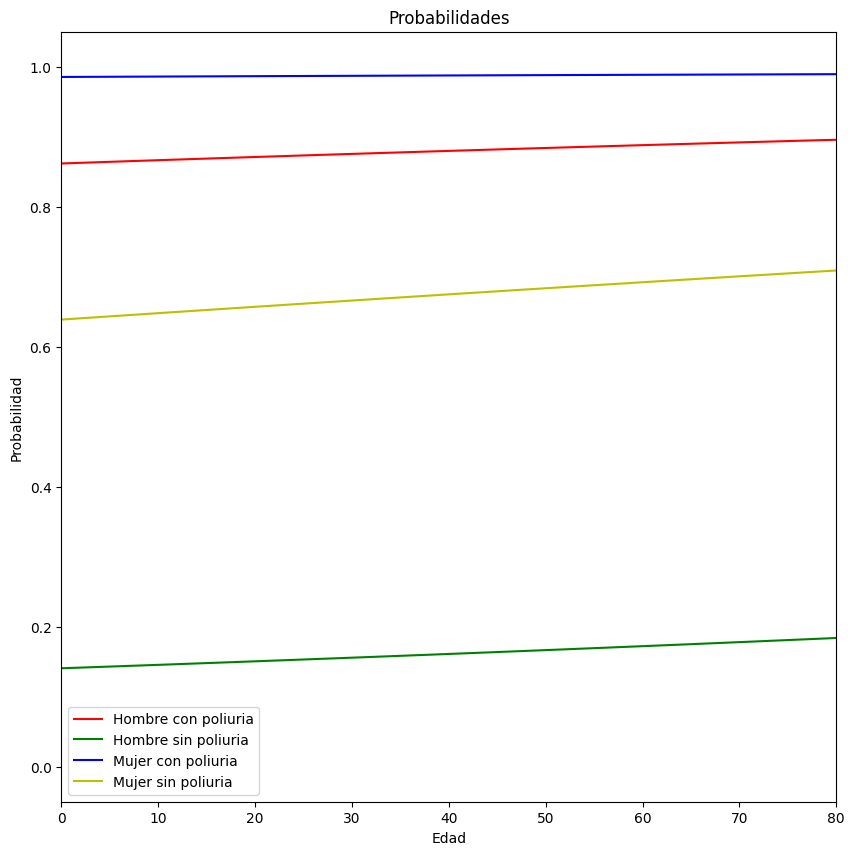

In [22]:
import math
  
# Using Numpy to create an array X
X = np.arange(-2500, 1800, 1)
  
# Assign variables to the y axis part of the curve
HP = 1/(1+np.exp(-1.83-0.004*X))
HSP = 1/(1+np.exp(1.81-0.004*X))
MP = 1/(1+np.exp(-4.21-0.004*X))
MSP = 1/(1+np.exp(-0.57-0.004*X))
plt.figure(figsize=(10,10))  
# Plotting both the curves simultaneously
plt.plot(X, HP, color='r', label='Hombre con poliuria')
plt.plot(X, HSP, color='g', label='Hombre sin poliuria')
plt.plot(X, MP, color='b', label='Mujer con poliuria')
plt.plot(X, MSP, color='y', label='Mujer sin poliuria')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Edad")
plt.ylabel("Probabilidad")
plt.title("Probabilidades")
plt.xlim(0, 80) 
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [23]:
np.round(logreg.predict_proba(X_test),2)[0:20]## Probabilidades en el prueba

array([[0.01, 0.99],
       [0.11, 0.89],
       [0.84, 0.16],
       [0.32, 0.68],
       [0.83, 0.17],
       [0.12, 0.88],
       [0.83, 0.17],
       [0.32, 0.68],
       [0.01, 0.99],
       [0.82, 0.18],
       [0.12, 0.88],
       [0.12, 0.88],
       [0.12, 0.88],
       [0.12, 0.88],
       [0.01, 0.99],
       [0.84, 0.16],
       [0.1 , 0.9 ],
       [0.84, 0.16],
       [0.83, 0.17],
       [0.01, 0.99]])

In [24]:
X_test.iloc[1:20]

,Age,Gender_Male,Polyuria_Yes
383,61,1,1
306,28,1,0
71,35,0,0
335,53,1,0
386,44,1,1
461,45,1,0
317,36,0,0
84,35,0,1
1,58,1,0
108,25,1,1


### Matriz de confusion en prueba

In [25]:
y_pred_test =logreg.predict(X_test)

confusion_matrix(y_test, y_pred_test)

array([[28, 12],
       [11, 53]])

### En entrenamiento

In [26]:
y_pred_train =logreg.predict(X_train)

confusion_matrix(y_train, y_pred_train)

array([[138,  22],
       [ 22, 234]])

In [27]:
y_pred_train=logreg.predict(X_train) ### Un umbral de 50%
y_pred_test=logreg.predict(X_test) ##  Un umbral de 50%
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

    Negative       0.86      0.86      0.86       160
    Positive       0.91      0.91      0.91       256

    accuracy                           0.89       416
   macro avg       0.89      0.89      0.89       416
weighted avg       0.89      0.89      0.89       416

En los datos de prueba 
               precision    recall  f1-score   support

    Negative       0.72      0.70      0.71        40
    Positive       0.82      0.83      0.82        64

    accuracy                           0.78       104
   macro avg       0.77      0.76      0.77       104
weighted avg       0.78      0.78      0.78       104



In [28]:
a=pd.DataFrame(np.round(logreg.predict_proba(X_train),3)[10:20],index=X_train.index[10:20] ,columns=["PFracaso", "PExito"])
a["Y_real"]=y_train[10:20]
a

,PFracaso,PExito,Y_real
487,0.012,0.988,Positive
192,0.821,0.179,Positive
370,0.833,0.167,Negative
110,0.307,0.693,Positive
298,0.012,0.988,Positive
314,0.835,0.165,Negative
113,0.811,0.189,Positive
336,0.835,0.165,Negative
378,0.114,0.886,Positive
17,0.819,0.181,Positive


## Y la parte estadística

In [29]:
from sklearn.preprocessing import label_binarize
X = Diabetes[['Age', 'Gender', 'Polyuria']]
X = pd.get_dummies(X, drop_first=True)
X
X_train, X_test, y_train, y_test=train_test_split(X, Y, random_state=123,test_size=0.2, stratify=Y) 
X_train.columns
X_train['Gender_Male'] = X_train['Gender_Male'].astype(float)

X_train['Age'] = X_train['Age'].astype(float)
X_train['Polyuria_Yes'] = X_train['Polyuria_Yes'].astype(float)
X_train_1 = sm.add_constant(X_train)
y_train = label_binarize(y_train, classes=["Negative", "Positive"]) 

In [30]:
y_train.shape

(416, 1)

In [31]:
log_reg = sm.Logit(y_train, X_train_1).fit()

Optimization terminated successfully.
         Current function value: 0.293702
         Iterations 7


In [32]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  416
Model:                          Logit   Df Residuals:                      412
Method:                           MLE   Df Model:                            3
Date:                Thu, 11 May 2023   Pseudo R-squ.:                  0.5592
Time:                        23:22:34   Log-Likelihood:                -122.18
converged:                       True   LL-Null:                       -277.17
Covariance Type:            nonrobust   LLR p-value:                 6.869e-67
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9292      0.722      1.287      0.198      -0.485       2.344
Age              0.0008      0.014      0.054      0.957      -0.027       0.028
Gender_Male     -2.8308      0.389     -7.26

## Y la parte estadística, pero con todas las variables

In [33]:
from sklearn.preprocessing import label_binarize
X = Diabetes.drop("class", axis=1)
X = pd.get_dummies(X, drop_first=True)
X
X_train, X_test, y_train, y_test=train_test_split(X, Y, random_state=123,test_size=0.2, stratify=Y) 
X_train.columns
X_train['Gender_Male'] = X_train['Gender_Male'].astype(float)

X_train['Age'] = X_train['Age'].astype(float)
X_train['Polyuria_Yes'] = X_train['Polyuria_Yes'].astype(float)
X_train_1 = sm.add_constant(X_train)
y_train = label_binarize(y_train, classes=["Negative", "Positive"]) 

In [34]:
y_train.shape

(416, 1)

In [35]:
log_reg = sm.Logit(y_train, X_train_1).fit()

Optimization terminated successfully.
         Current function value: 0.135146
         Iterations 10


In [36]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  416
Model:                          Logit   Df Residuals:                      399
Method:                           MLE   Df Model:                           16
Date:                Thu, 11 May 2023   Pseudo R-squ.:                  0.7972
Time:                        23:22:35   Log-Likelihood:                -56.221
converged:                       True   LL-Null:                       -277.17
Covariance Type:            nonrobust   LLR p-value:                 5.803e-84
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.9499      1.362      2.165      0.030       0.280       5.620
Age                       -0.0566      0.033     -1.697      0.090      -0.122       0.009
Gend

In [37]:
resumen = log_reg.summary()
results_as_html = resumen.tables[1].as_html()
tabla = pd.read_html(results_as_html, header=0, index_col=0)[0]
tabla

,coef,std err,z,P>|z|,[0.025,0.975]
const,2.9499,1.362,2.165,0.030,0.280,5.620
Age,-0.0566,0.033,-1.697,0.090,-0.122,0.009
Gender_Male,-5.2775,0.844,-6.255,0.000,-6.931,-3.624
Polyuria_Yes,5.4625,0.988,5.530,0.000,3.526,7.399
Polydipsia_Yes,6.0165,1.163,5.175,0.000,3.738,8.295
sudden weight loss_Yes,-0.2194,0.732,-0.300,0.764,-1.654,1.216
weakness_Yes,0.9968,0.725,1.375,0.169,-0.424,2.418
Polyphagia_Yes,1.6043,0.681,2.356,0.018,0.270,2.939
Genital thrush_Yes,2.3422,0.718,3.263,0.001,0.935,3.749
visual blurring_Yes,1.0729,0.875,1.226,0.220,-0.642,2.788


In [38]:
tabla.sort_values("P>|z|")

,coef,std err,z,P>|z|,[0.025,0.975]
Gender_Male,-5.2775,0.844,-6.255,0.000,-6.931,-3.624
Polyuria_Yes,5.4625,0.988,5.530,0.000,3.526,7.399
Polydipsia_Yes,6.0165,1.163,5.175,0.000,3.738,8.295
Itching_Yes,-2.8469,0.799,-3.563,0.000,-4.413,-1.281
Genital thrush_Yes,2.3422,0.718,3.263,0.001,0.935,3.749
Irritability_Yes,2.4249,0.751,3.228,0.001,0.952,3.898
Polyphagia_Yes,1.6043,0.681,2.356,0.018,0.270,2.939
const,2.9499,1.362,2.165,0.030,0.280,5.620
partial paresis_Yes,1.2745,0.695,1.834,0.067,-0.087,2.636
Age,-0.0566,0.033,-1.697,0.090,-0.122,0.009


In [39]:
signif = tabla[tabla["P>|z|"]<0.05].index.to_list()

In [40]:
log_reg = sm.Logit(y_train, X_train_1[signif]).fit()

Optimization terminated successfully.
         Current function value: 0.153834
         Iterations 10


In [41]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  416
Model:                          Logit   Df Residuals:                      408
Method:                           MLE   Df Model:                            7
Date:                Thu, 11 May 2023   Pseudo R-squ.:                  0.7691
Time:                        23:22:36   Log-Likelihood:                -63.995
converged:                       True   LL-Null:                       -277.17
Covariance Type:            nonrobust   LLR p-value:                 5.294e-88
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.4949      0.524      2.853      0.004       0.468       2.522
Gender_Male           -5.3212      0.775     -6.866      0.000      -6.840      -3.802
Polyuria_Yes        

# Curva ROC

Sirve para escoger el umbral de decisión

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
Y=Diabetes["class"] ## Selecciono a Y
X=Diabetes[['Age', "Gender", "Polyuria"]] ## Selecciono las X
X= pd.get_dummies(X, drop_first=True)
## Volverla una variable dummy
Y = label_binarize(Y, classes=[ "Negative","Positive"]) 
## Vuelvo a Y de 0 y 1 (dummy)
X_train, X_test, y_train, y_test=train_test_split(X, Y,random_state=123, test_size=0.2, stratify=Y) ## Divido en entrenamiento y prueba
logreg=LogisticRegression(C=1) ### Llamo la regresion
logreg.fit(X_train, y_train)  ### La ajusto en entrenamiento

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1)

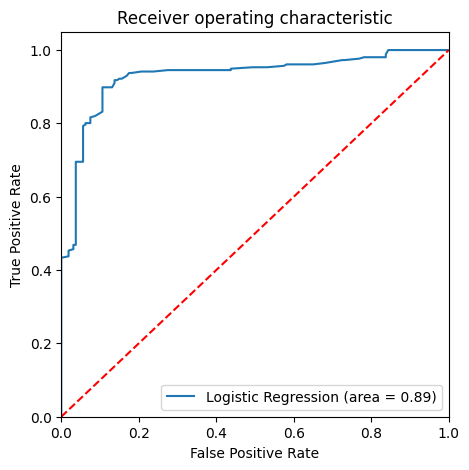

In [43]:

logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_train))  ## Calculo el area bajo la curva
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1]) ## Calculo la fpr(false positive rate),
## la tpr(true positive rate) y thresholds (los umbrales)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Tarea

La distancia al punto perfecto, (0,1) = (0% FP, 100% TP) está dada por:

$$distancia =\sqrt{FPR^2+(1-TPR)^2}=\sqrt{FPR^2+FNR^2}$$

El mejor umbral es aquel que hace que la suma al cuadrado de la tasa de falsos positivos más la tasa de falsos negativos sea más chiquita. 

In [44]:
paraumbral=pd.DataFrame(np.transpose(np.round(roc_curve(y_train, logreg.predict_proba(X_train)[:,1]),4)), 
                        columns=["FPR", "TPR", "Umbral"])
paraumbral["Distancia"]=np.sqrt(paraumbral["FPR"]**2 +(1-paraumbral["TPR"])**2)
paraumbral.sort_values("Distancia")

,FPR,TPR,Umbral,Distancia
63,0.1062,0.8984,0.6754,0.146973
62,0.1062,0.8867,0.6784,0.155291
66,0.1375,0.9180,0.1894,0.160095
61,0.1062,0.8789,0.6853,0.161070
65,0.1375,0.9102,0.6684,0.164226
...,...,...,...,...
2,0.0000,0.0430,0.9894,0.957000
1,0.0000,0.0156,0.9894,0.984400
101,0.9938,1.0000,0.1557,0.993800
0,0.0000,0.0000,1.9894,1.000000


In [45]:
thres=0.3612
y_pred= np.where(logreg.predict_proba(X_train)[:,1] > thres, 1, 0)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,

In [46]:
thres=0.3612
y_pred_train=np.where(logreg.predict_proba(X_train)[:,1] > thres, 1, 0)
y_pred_test=np.where(logreg.predict_proba(X_test)[:,1] > thres, 1, 0)
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       160
           1       0.91      0.91      0.91       256

    accuracy                           0.89       416
   macro avg       0.89      0.89      0.89       416
weighted avg       0.89      0.89      0.89       416

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.72      0.70      0.71        40
           1       0.82      0.83      0.82        64

    accuracy                           0.78       104
   macro avg       0.77      0.76      0.77       104
weighted avg       0.78      0.78      0.78       104



## Con todas las variables


In [47]:
url="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/Diabetes.csv"
Diabetes=pd.read_csv(url, sep=";")
### Y es la variable binaria (Positive o Negative)
Y=Diabetes["class"] ## Seleccionamos la variable objetivo (binaria)
### las X son todas las demas
X=Diabetes.drop("class", axis=1) ## Seleccionamos las variables explicativas
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [48]:
X = pd.get_dummies(X, drop_first=True)
X

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [49]:
Diabetes.groupby("class").size()

class
Negative    200
Positive    320
dtype: int64

In [50]:
####
X_train, X_test, y_train, y_test=train_test_split(X, Y,test_size=0.2, stratify=Y) 
## Dividimos en entrenamiento y prueba, y estratificando
##por la variable Y
X_train.shape

(416, 16)

In [51]:
pd.DataFrame(y_train).groupby("class").size()

class
Negative    160
Positive    256
dtype: int64

In [52]:
logreg=LogisticRegression(C=1) ### Llamo la regresión logistica, con todos
### los valores por defecto
logreg.fit(X_train, y_train) ## Entreno el modelo
print("Intercepto", logreg.intercept_)
print("Beta",pd.DataFrame(np.transpose(logreg.coef_), index=X_train.columns, columns=["betas"])) ## Extraigo los parámetros

Intercepto [0.91045015]
Beta                            betas
Age                    -0.014200
Gender_Male            -2.894400
Polyuria_Yes            2.508516
Polydipsia_Yes          2.985260
sudden weight loss_Yes  0.783011
weakness_Yes            0.146756
Polyphagia_Yes          0.508250
Genital thrush_Yes      1.132958
visual blurring_Yes     0.615786
Itching_Yes            -1.043882
Irritability_Yes        1.661091
delayed healing_Yes    -0.560874
partial paresis_Yes     0.645667
muscle stiffness_Yes   -0.330991
Alopecia_Yes           -0.327107
Obesity_Yes            -0.270988


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Para selección automática de caracteristicas

El algoritmo [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

 Recursive feature extraction (extración recursiva de variables), el usa la deviance del modelo


$$\left(-2\sum_{i=1}^n \left\{Y_i \ln(p_i)+(1-Y_i)\ln(1-p_i)\right\}\right)+K$$

En R se usaría el AIC (criterio de información de Akaike)

In [53]:
logreg1=LogisticRegression() ### LLamo a la regresión logistica
rfe=RFE(logreg1, n_features_to_select=10) ## Le digo que solo me seleccione 5 variables mas importantes
## Pueden ser menos si lo desea.
rfe.fit(X_train, y_train)
rfe.ranking_
X_train.columns[rfe.ranking_==1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Index(['Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden weight loss_Yes', 'Genital thrush_Yes', 'visual blurring_Yes',
       'Itching_Yes', 'Irritability_Yes', 'delayed healing_Yes',
       'partial paresis_Yes'],
      dtype='object')

## Despues de seleccionar las 5 variables, ajusto el modelo

In [54]:
logreg=LogisticRegression()
Xnueva_train=X_train[['Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden weight loss_Yes', 'Polyphagia_Yes', 'Genital thrush_Yes',
       'Itching_Yes', 'Irritability_Yes', 'delayed healing_Yes',
       'partial paresis_Yes']] ## Selecciono de X las variables más importantes
Xnueva_test=X_test[['Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden weight loss_Yes', 'Polyphagia_Yes', 'Genital thrush_Yes',
       'Itching_Yes', 'Irritability_Yes', 'delayed healing_Yes',
       'partial paresis_Yes']] ## Hago lo mismo en el conjunto de datos de prueba
logreg.fit(Xnueva_train, y_train) ## Ajusto el modelo
print("Intercepto", logreg.intercept_)
print("Beta",pd.DataFrame(np.transpose(logreg.coef_), index=['Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden weight loss_Yes', 'Polyphagia_Yes', 'Genital thrush_Yes',
       'Itching_Yes', 'Irritability_Yes', 'delayed healing_Yes',
       'partial paresis_Yes'], columns=["betas"])) ## Extraigo los parámetros

Intercepto [0.42253717]
Beta                            betas
Gender_Male            -3.040986
Polyuria_Yes            2.348673
Polydipsia_Yes          3.086734
sudden weight loss_Yes  0.869828
Polyphagia_Yes          0.543655
Genital thrush_Yes      1.025555
Itching_Yes            -1.016238
Irritability_Yes        1.560424
delayed healing_Yes    -0.712652
partial paresis_Yes     0.709743


In [55]:
y_pred_train=logreg.predict(Xnueva_train) ### Umbral de 0.5
confusion_matrix(y_train, y_pred_train)

array([[149,  11],
       [ 13, 243]])

In [56]:
y_pred_test=logreg.predict(Xnueva_test)
confusion_matrix(y_test, y_pred_test)

array([[37,  3],
       [ 8, 56]])

In [57]:
y_pred_train=logreg.predict(Xnueva_train) ### Umbral de 0.5
y_pred_test=logreg.predict(Xnueva_test)
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

    Negative       0.92      0.93      0.93       160
    Positive       0.96      0.95      0.95       256

    accuracy                           0.94       416
   macro avg       0.94      0.94      0.94       416
weighted avg       0.94      0.94      0.94       416

En los datos de prueba 
               precision    recall  f1-score   support

    Negative       0.82      0.93      0.87        40
    Positive       0.95      0.88      0.91        64

    accuracy                           0.89       104
   macro avg       0.89      0.90      0.89       104
weighted avg       0.90      0.89      0.90       104



In [58]:
y_pred_train=logreg.predict(Xnueva_test)
y_pred_train
#y_pred_test=logreg.predict(Xnueva_test)

array(['Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positi

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


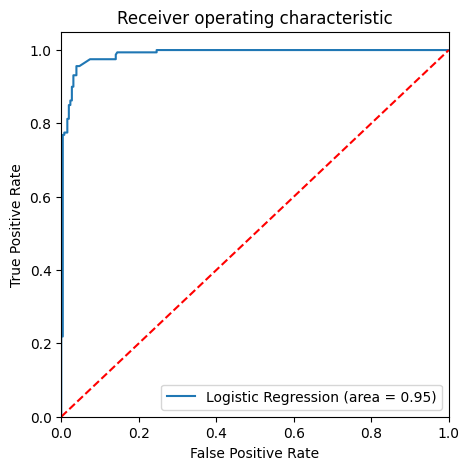

In [59]:
### ROC 
### AUC (Area under curve)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#### Volver dummie a Y
from sklearn.preprocessing import label_binarize
Y=Diabetes["class"] ## Selecciono a Y
X=Diabetes.drop("class", axis=1)
X= pd.get_dummies(X, drop_first=True)
### Las 5 variables de allá arriba
X= X[['Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden weight loss_Yes', 'Polyphagia_Yes', 'Genital thrush_Yes',
       'Itching_Yes', 'Irritability_Yes', 'delayed healing_Yes',
       'partial paresis_Yes']] ## Selecciono las X
## Volverla una variable dummy
Y = label_binarize(Y, classes=["Positive", "Negative"]) 
## Vuelvo a Y de 0 y 1 (dummy)
X_train, X_test, y_train, y_test=train_test_split(X, Y,random_state=123,
                                                  test_size=0.2, stratify=Y) ## Divido en entrenamiento y prueba
logreg=LogisticRegression(C=1) ### Llamo la regresion
logreg.fit(X_train, y_train)  ### La ajusto en entrenamiento
logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_train))  ## Calculo el area bajo la curva
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1]) ## Calculo la fpr(false positive rate),
## la tpr(true positive rate) y thresholds (los umbrales)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [60]:
Umbrales = pd.DataFrame(zip(fpr, tpr, thresholds), columns=["FPR", "TPR", "Umbral"])
Umbrales["Distancia"] =np.sqrt(Umbrales["FPR"]**2 + (1-Umbrales["TPR"])**2)
Umbrales

,FPR,TPR,Umbral,Distancia
0,0.000000,0.00000,1.990653,1.000000
1,0.000000,0.10000,0.990653,0.900000
2,0.000000,0.17500,0.979729,0.825000
3,0.000000,0.20625,0.977948,0.793750
4,0.000000,0.21875,0.973406,0.781250
...,...,...,...,...
112,0.914062,1.00000,0.000266,0.914062
113,0.964844,1.00000,0.000214,0.964844
114,0.980469,1.00000,0.000121,0.980469
115,0.992188,1.00000,0.000092,0.992188


In [61]:
Umbrales.sort_values("Distancia",ascending=True)

,FPR,TPR,Umbral,Distancia
34,0.039062,0.95625,0.436488,0.058651
35,0.046875,0.95625,0.426025,0.064120
33,0.039062,0.94375,0.447681,0.068483
31,0.031250,0.93125,0.590066,0.075519
36,0.074219,0.97500,0.395324,0.078316
...,...,...,...,...
113,0.964844,1.00000,0.000214,0.964844
114,0.980469,1.00000,0.000121,0.980469
115,0.992188,1.00000,0.000092,0.992188
0,0.000000,0.00000,1.990653,1.000000


## Colocando el Umbral de ahora

In [62]:
thres=0.436488
y_pred_train=np.where(logreg.predict_proba(X_train)[:,1] > thres, 1, 0)
y_pred_test=np.where(logreg.predict_proba(X_test)[:,1] > thres, 1, 0)
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       256
           1       0.94      0.96      0.95       160

    accuracy                           0.96       416
   macro avg       0.96      0.96      0.96       416
weighted avg       0.96      0.96      0.96       416

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.95      0.83      0.88        64
           1       0.77      0.93      0.84        40

    accuracy                           0.87       104
   macro avg       0.86      0.88      0.86       104
weighted avg       0.88      0.87      0.87       104



# Tarjetas de credito

1. Los datos de tarjeta de credito [acá](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
url="/content/drive/MyDrive/2023/Fundamentos de Estadistica/Hojas de datos/Creditcard.csv"
fraude=pd.read_csv(url)
fraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Graficas básicas

In [ ]:
fig = px.scatter(fraude, x="V14", y="Amount", color=fraude["Class"].astype(str))
fig.show()

In [65]:
fraude.groupby("Class").size()/fraude.shape[0]

Class
0    0.998273
1    0.001727
dtype: float64

In [77]:
fraude.groupby("Class").size()

Class
0    284315
1       492
dtype: int64

In [82]:
Y=fraude["Class"]
X=fraude.drop(["Class"], axis=1)
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=123)
X_train.shape

(227845, 30)

In [83]:
y_test

24729     0
124222    0
214211    0
64868     0
116182    0
         ..
260463    0
154446    0
160659    0
134551    0
278423    0
Name: Class, Length: 56962, dtype: int64

In [86]:
pd.DataFrame(y_test,index=X_test.index).groupby("Class").size()

Class
0    56864
1       98
dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



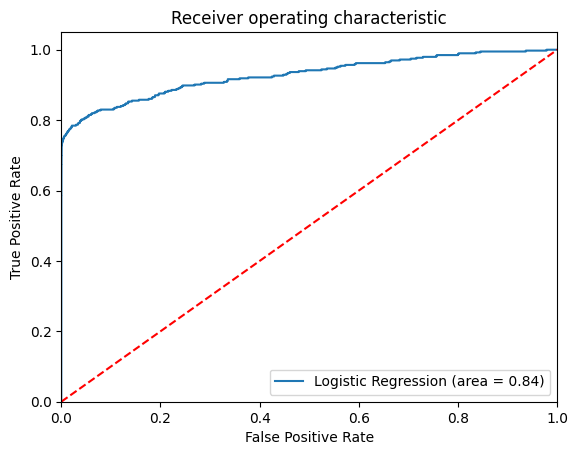

In [87]:
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [91]:
thres=0.5
y_pred_train=np.where(logreg.predict_proba(X_train)[:,1] > thres, 1, 0)
y_pred_test=np.where(logreg.predict_proba(X_test)[:,1] > thres, 1, 0)
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train, digits=5))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test, digits=5))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0    0.99945   0.99953   0.99949    227451
           1    0.71618   0.68528   0.70039       394

    accuracy                        0.99899    227845
   macro avg    0.85782   0.84240   0.84994    227845
weighted avg    0.99897   0.99899   0.99897    227845

En los datos de prueba 
               precision    recall  f1-score   support

           0    0.99935   0.99967   0.99951     56864
           1    0.76250   0.62245   0.68539        98

    accuracy                        0.99902     56962
   macro avg    0.88092   0.81106   0.84245     56962
weighted avg    0.99894   0.99902   0.99897     56962



In [89]:
confusion_matrix(y_train, y_pred_train)

array([[227344,    107],
       [   124,    270]])

In [90]:
confusion_matrix(y_test, y_pred_test)

array([[56845,    19],
       [   37,    61]])

In [93]:
paraumbral=pd.DataFrame(np.transpose(np.round(roc_curve(y_train, logreg.predict_proba(X_train)[:,1]),4)),
                        columns=["FPR", "TPR", "umbral"])
paraumbral["Distancia"]=np.sqrt(paraumbral["FPR"]**2 +(1-paraumbral["TPR"])**2)
paraumbral.sort_values("Distancia")

,FPR,TPR,umbral,Distancia
347,0.0735,0.8274,0.0036,0.187598
355,0.0792,0.8299,0.0033,0.187634
348,0.0745,0.8274,0.0036,0.187992
349,0.0745,0.8274,0.0036,0.187992
345,0.0710,0.8249,0.0038,0.188947
...,...,...,...,...
1470,0.9987,1.0000,0.0000,0.998700
1473,0.9997,1.0000,0.0000,0.999700
1472,0.9997,1.0000,0.0000,0.999700
0,0.0000,0.0000,2.0000,1.000000


### Algoritmo c5.0

1. Algoritmo para darle más peso a una clase que a otra.



```
class_weight={0:1, 1:4}
```

Equivocarme con un fraude es cuatro veces más costoso que equivocarme con un no fraude.



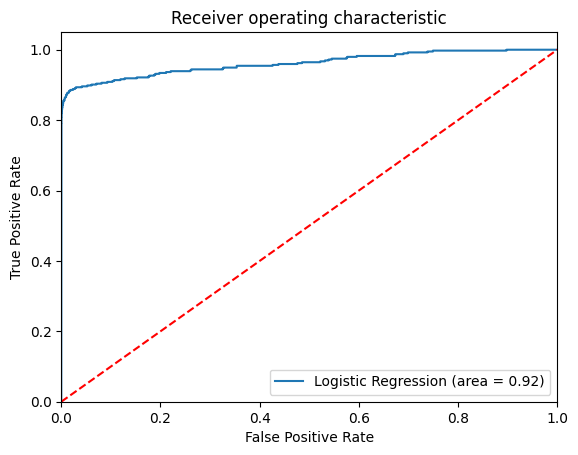

In [100]:
logreg=LogisticRegression(class_weight={0:1, 1:4})
logreg.fit(X_train, y_train)
logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [101]:
thres=0.5
y_pred_train=np.where(logreg.predict_proba(X_train)[:,1] > thres, 1, 0)
y_pred_test=np.where(logreg.predict_proba(X_test)[:,1] > thres, 1, 0)
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train, digits=5))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test, digits=5))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0    0.99975   0.99421   0.99697    227451
           1    0.20375   0.85533   0.32910       394

    accuracy                        0.99397    227845
   macro avg    0.60175   0.92477   0.66304    227845
weighted avg    0.99837   0.99397   0.99582    227845

En los datos de prueba 
               precision    recall  f1-score   support

           0    0.99968   0.99439   0.99703     56864
           1    0.20050   0.81633   0.32193        98

    accuracy                        0.99408     56962
   macro avg    0.60009   0.90536   0.65948     56962
weighted avg    0.99831   0.99408   0.99587     56962



## Seleccionando un umbral

In [95]:
thres=0.0036
y_pred_train=np.where(logreg.predict_proba(X_train)[:,1] > thres, 1, 0)
y_pred_test=np.where(logreg.predict_proba(X_test)[:,1] > thres, 1, 0)
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train, digits=5))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test, digits=5))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0    0.99968   0.92607   0.96147    227451
           1    0.01902   0.82741   0.03718       394

    accuracy                        0.92590    227845
   macro avg    0.50935   0.87674   0.49933    227845
weighted avg    0.99798   0.92590   0.95987    227845

En los datos de prueba 
               precision    recall  f1-score   support

           0    0.99954   0.92591   0.96132     56864
           1    0.01726   0.75510   0.03375        98

    accuracy                        0.92562     56962
   macro avg    0.50840   0.84051   0.49754     56962
weighted avg    0.99785   0.92562   0.95972     56962



In [96]:
confusion_matrix(y_test, y_pred_test)

array([[52651,  4213],
       [   24,    74]])

## Regresión Ridge 

1. La regresión Lasso (penalidad de valor absoluto no está soportada)

2. La regresión Ridge añade una penalización de forma cuadrática.


In [118]:
validacionRidge= LogisticRegressionCV(cv=5, random_state=0, penalty="l2").fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

### Los $\beta$

In [119]:
validacionRidge.coef_

array([[-3.67927265e-05,  8.38670437e-02, -8.52857874e-02,
        -3.17715023e-01,  1.97424031e-01,  9.99958619e-02,
        -6.02933068e-02,  1.01463502e-01, -1.33733022e-01,
        -1.53375266e-01, -2.12432673e-01,  2.47965698e-02,
        -1.72592988e-01, -8.53760110e-02, -4.53672946e-01,
        -1.34335989e-01, -1.59925755e-01, -2.12483315e-01,
         7.51771300e-03,  4.26301263e-02,  1.01173668e-02,
         1.22776331e-01,  1.22645013e-01,  1.75180772e-02,
        -1.13174987e-02, -1.18240212e-01,  2.94092135e-02,
        -1.18952234e-02,  4.29825711e-03, -1.17809653e-03]])

In [120]:
pd.DataFrame(np.transpose(validacionRidge.coef_),
             index = X_train.columns, columns=["Beta"]).sort_values("Beta")

,Beta
V14,-0.453673
V3,-0.317715
V17,-0.212483
V10,-0.212433
V12,-0.172593
V16,-0.159926
V9,-0.153375
V15,-0.134336
V8,-0.133733
V25,-0.118240


In [121]:
fig = px.scatter(fraude, x="V14", y="V4", color=fraude["Class"].astype(str))
fig.show()

Output hidden; open in https://colab.research.google.com to view.